In [1]:
import numpy as np
import scipy as sp
from math import pi, tanh
from cmath import sqrt
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
import time

In [2]:
k0u=0.575
k0d=0.33

def nu2bands(params):
    D1=params['D1']
    D2=params['D2']
    D12=params['D12']
    vF=params['vF']

    dmat= np.zeros((2,2))
    dmat[0,0]= D1
    dmat[0,1]= D12
    dmat[1,0]= -D12
    dmat[1,1]= D2
    Hd=np.block([
        [np.zeros((2,2)), dmat],
        [-dmat, np.zeros((2,2))]
    ])

    k_sw= np.linspace(-1,1,4001)*4
    En1= np.zeros((len(k_sw),8))
    En2= np.zeros((len(k_sw),8))
    for i_k in range(len(k_sw)):
        Hp= vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(2),-np.ones(2))))\
            -vF*np.diag([k0u,k0d,k0u,k0d])
        HpT= -vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(2),-np.ones(2))))\
            -vF*np.diag([k0u,k0d,k0u,k0d])
        H1= np.block([
            [Hp, Hd],
            [np.matrix(Hd).H, -HpT]
        ])
        En1[i_k,:], _ = np.linalg.eigh(H1)
    #        + D1*np.kron(sy,np.kron(sx,sy))\
    return k_sw, En1
   

vF_6=0.6
k0s= np.array([0.14,0.3,0.629,0.81,vF_6*1.27,vF_6*1.46])
k0= np.diag(np.kron([1,1],k0s))

def nu6bands(params):

    D1=params['D1']
    D2=params['D2']
    D3=params['D3']
    D4=params['D4']
    D5=params['D5']
    D6=params['D6']
    D12=params['D12']
    D23=params['D23']
    D34=params['D34']
    D45=params['D45']
    D56=params['D56']
    vF=params['vF']
                                        
    # dmat= np.zeros((6,6))
    dmat= np.array([[D1,D12,0,0,0,0],
                    [D12,D2,D23,0,0,0],
                    [0,D23,D3,D34,0,0],
                    [0,0,D34,D4,D45,0],
                    [0,0,0,D45,D5,D56],
                    [0,0,0,0,D56,D6]])
    Hd=np.block([
        [np.zeros((6,6)), dmat],
        [-dmat, np.zeros((6,6))]
    ])

    k_sw= np.linspace(-1,1,400)*2
    En1= np.zeros((len(k_sw),24))
    for i_k in range(len(k_sw)):

        Hp= vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(4),vF_6*np.ones(2),-np.ones(4),-vF_6*np.ones(2))))\
             -vF*k0
        HpT= -vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(4),vF_6*np.ones(2),-np.ones(4),-vF_6*np.ones(2))))\
             -vF*k0
        H1= np.block([
            [Hp, Hd],
            [np.matrix(Hd).H, -HpT]
        ])
        En1[i_k,:], _ = np.linalg.eigh(H1)

    return k_sw, En1

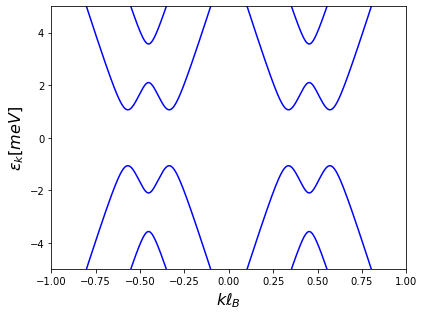

In [6]:
 # nu=2 warm up
D1_2=0.04
D12_2= 0.03
D2_2=0.04
vF=0.8

params_2= {'D1':D1_2, 'D2':D2_2, 'D12':D12_2, 'vF':vF}
k2,E2= nu2bands(params_2)

# nu=6 
vF=1
D1=0.018
D2=0.0188
D3=0.004
D4=0.0066
D5=0.013
D6=0.018
D12=0.038
D23=0.0
D34=0.04
D45=0.
D56=0.02
params_6= {'D1':D1, 'D2':D2, 'D3':D3,\
           'D4':D4, 'D5':D5, 'D6':D6,\
           'D12':D12, 'D23':D23, 'D34':D34,\
           'D45':D45, 'D56':D56, 'vF':vF}

k6,E6= nu6bands(params_6)



fac=26.622359

plt.figure(figsize=(6,4.5))
plt.plot(k2,fac*E2,'b')
# plt.plot(k6,fac*E6,'b')

plt.xlabel('k')
plt.ylabel('E')
fsize=16
plt.ylabel(r"$\varepsilon_k [meV]$",fontsize = fsize)
plt.xlabel(r"$k\ell_B$",fontsize = fsize)
plt.ylim(-5,5)
plt.xlim(-1,1)
# plt.xticks([0,2,4])
# plt.yticks(np.arange(-2,2.1,1))
# plt.grid()
plt.tight_layout()
plt.savefig('figs_new/nu2_eff_bands.pdf')
plt.show()

In [7]:
def nu2_Andreev_clean(Z,params):
    D1=params['D1']
    D2=params['D2']
    D12=params['D12']
    vF=params['vF']

    Esw0= np.linspace(-0.3,0.3,400)
    Ree=np.zeros((2,2,len(Esw0)))
    Reh=np.zeros((2,2,len(Esw0)))


    dmat= np.zeros((2,2))
    dmat[0,0]= D1
    dmat[0,1]= D12
    dmat[1,0]= -D12
    dmat[1,1]= D2
    Hdelta=np.block([
        [np.zeros((2,2)), dmat],
        [-dmat, np.zeros((2,2))]
    ])

    k0s= np.array([k0u,k0d])
    k0= np.diag(np.kron([1,1],k0s))

    Ham= np.block([
        [-vF*k0, Hdelta],
        [np.matrix(Hdelta).H, vF*k0]
    ])

    vk= vF*np.diag(np.concatenate((np.ones(2),-np.ones(2),np.ones(2),-np.ones(2))))
    Hd= 1/vF*np.diag(np.concatenate((np.ones(2),-np.ones(2),np.ones(2),-np.ones(2))))
    # Hd= np.linalg.inv(vk)

    for i_E in range(len(Esw0)):
        E=Esw0[i_E]
        Ht= np.dot(Hd,E*np.eye(8)-  Ham)
        evs, evecs = np.linalg.eig(Ht)

        i_evan= np.where( np.abs(np.imag(evs)) > 1e-5 )[0]
        ie_T= np.where( np.imag(evs[i_evan]) > 0)[0]
        ie_R= np.where( np.imag(evs[i_evan]) < 0)[0]

        i_prop= np.where( np.abs(np.imag(evs)) < 1e-5 )[0]
        evecs_inv=np.linalg.inv(evecs)
        Jmat = np.reshape(np.diag(np.dot(evecs_inv,np.dot(vk,evecs))),[8,])
        ip_T= np.where( np.real(Jmat[i_prop]) > 0)[0]
        ip_R= np.where( np.real(Jmat[i_prop]) < 0)[0]

        i_T=np.concatenate((i_prop[ip_T],i_evan[ie_T]))
        i_R=np.concatenate((i_prop[ip_R],i_evan[ie_R]))

        evecs= np.dot(evecs,np.diag(1/(Jmat+1j*0)**0.5))
        Tevecs = evecs[:,i_T]    
        Revecs = evecs[:,i_R]    
        evecs_0= np.concatenate((Tevecs,Revecs),axis=1)

        Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(2))
        Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(2))
        evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)

        Tmat=sp.linalg.solve(evecs_0,evecs_l)
        Tz=[[np.cosh(Z),0,-1j*np.sinh(Z),0],\
            [0,np.cosh(Z),0,-1j*np.sinh(Z)],\
            [1j*np.sinh(Z),0,np.cosh(Z),0],\
            [0,1j*np.sinh(Z),0,np.cosh(Z)]]
        Tt=np.dot(Tmat,np.kron(Tz,np.eye(2)))
        TLL=Tt[np.ix_(np.arange(4,8),np.arange(4,8))]
        TLR=Tt[np.ix_(np.arange(4,8),np.arange(0,4))]
        x= -sp.linalg.solve(TLL,TLR)
    #     x= -np.dot(np.linalg.inv(TLL),TLR)
        Ree[:,:,i_E] = np.abs(x[0:2,0:2])**2
        Reh[:,:,i_E] = np.abs(x[2:4,0:2])**2
    return Esw0, Ree, Reh

def nu6_Andreev_clean(Z,params):
    
    D1=params['D1']
    D2=params['D2']
    D3=params['D3']
    D4=params['D4']
    D5=params['D5']
    D6=params['D6']
    D12=params['D12']
    D23=params['D23']
    D34=params['D34']
    D45=params['D45']
    D56=params['D56']
    vF=params['vF']
    
    Esw0= np.linspace(-0.3,0.3,400)

    Ree=np.zeros((6,6,len(Esw0)))
    Reh=np.zeros((6,6,len(Esw0)))

    dmat= np.array([[D1,D12,0,0,0,0],
                    [-D12,D2,D23,0,0,0],
                    [0,-D23,D3,D34,0,0],
                    [0,0,-D34,D4,D45,0],
                    [0,0,0,-D45,D5,D56],
                    [0,0,0,0,-D56,D6]])
    Hdelta=np.block([
        [np.zeros((6,6)), dmat],
        [-dmat.T, np.zeros((6,6))]
    ])

    Ham= np.block([
        [-vF*k0, Hdelta],
        [np.matrix(Hdelta).H, vF*k0]
    ])

    vk= vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
    Hd= 1/vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
    # Hd= np.linalg.inv(vk)

    for i_E in range(len(Esw0)):
        E=Esw0[i_E]
    #     print(E)
        Ht= np.dot(Hd,E*np.eye(24)-  Ham)
        evs, evecs = np.linalg.eig(Ht)
    #     print(evs)

        i_evan= np.where( np.abs(np.imag(evs)) > 1e-5 )[0]
        ie_T= np.where( np.imag(evs[i_evan]) > 0)[0]
        ie_R= np.where( np.imag(evs[i_evan]) < 0)[0]

        i_prop= np.where( np.abs(np.imag(evs)) < 1e-5 )[0]
        evecs_inv=np.linalg.inv(evecs)
    #     evecs_inv=np.transpose(evecs)
        Jmat = np.reshape(np.diag(np.dot(evecs_inv,np.dot(vk,evecs))),[24,])
        ip_T= np.where( np.real(Jmat[i_prop]) > 0)[0]
        ip_R= np.where( np.real(Jmat[i_prop]) < 0)[0]

        i_T=np.concatenate((i_prop[ip_T],i_evan[ie_T]))
        i_R=np.concatenate((i_prop[ip_R],i_evan[ie_R]))

        evecs= np.dot(evecs,np.diag(1/(Jmat+1j*0)**0.5))
        Tevecs = evecs[:,i_T]    
        Revecs = evecs[:,i_R]    
        evecs_0= np.concatenate((Tevecs,Revecs),axis=1)

        Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(6))
        Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(6))
        evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)

        Tmat=sp.linalg.solve(evecs_0,evecs_l)
        Tz=[[1-1j*Z,0,-1j*Z,0],\
            [0,1+1j*Z,0,-1j*Z],\
            [1j*Z,0,1+1j*Z,0],\
            [0,1j*Z,0,1-1j*Z]]

        Tt=np.dot(Tmat,np.kron(Tz,np.eye(6)))
        TLL=Tt[np.ix_(np.arange(12,24),np.arange(12,24))]
        TLR=Tt[np.ix_(np.arange(12,24),np.arange(0,12))]
        x= -sp.linalg.solve(TLL,TLR)
    #     x= -np.dot(np.linalg.inv(TLL),TLR)
        Ree[:,:,i_E] = np.abs(x[0:6,0:6])**2
        Reh[:,:,i_E] = np.abs(x[6:12,0:6])**2

    return Esw0, Ree, Reh

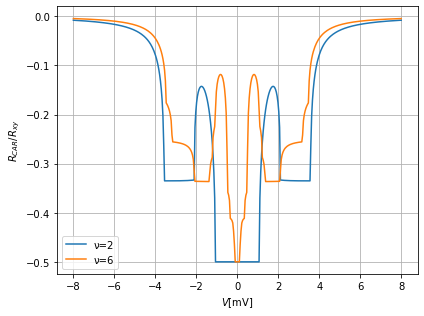

In [8]:
Z=0
Esw6, Ree6, Reh6=nu6_Andreev_clean(Z,params_6)
Esw2, Ree2, Reh2=nu2_Andreev_clean(Z,params_2)

fig, ax = plt.subplots(figsize=(6,4.5))

fac=26.622359
# plt.plot(fac*Esw2,np.sum(np.sum(Reh2,axis=1),axis=0))
# plt.plot(fac*Esw6,np.sum(np.sum(Reh6,axis=1),axis=0))

x2 = -np.sum(np.sum(Reh2,axis=1),axis=0)+np.sum(np.sum(Ree2,axis=1),axis=0)
plt.plot(fac*Esw2,x2/(2-x2),label='ν=2')

x6 = -np.sum(np.sum(Reh6,axis=1),axis=0)+np.sum(np.sum(Ree6,axis=1),axis=0)
plt.plot(fac*Esw6,x6/(6-x6),label='ν=6')

plt.ylabel(r'$R_{CAR}/R_{xy}$')
plt.xlabel(r'$V$[mV]')

plt.tight_layout()
plt.legend()
plt.grid()
plt.savefig('figs_new/CAR_eff_nu2_6.pdf')

plt.show()

In [9]:
import scipy.io
scipy.io.savemat('Rcar_clean_nu2_and_6.mat', {'dV2': fac*Esw2, 'Rcar2': x2/(2-x2)/2,\
                                        'dV6': fac*Esw6, 'Rcar6': x6/(6-x6)/6})


In [167]:
out_dir='Dis1d_data_files/'

def nu6_Andreev_disorder(Nrep,Nimp,L,Z,params):
    
    D1=params['D1']
    D2=params['D2']
    D3=params['D3']
    D4=params['D4']
    D5=params['D5']
    D6=params['D6']
    D12=params['D12']
    D23=params['D23']
    D34=params['D34']
    D45=params['D45']
    D56=params['D56']
    vF=params['vF']

    Esw= np.linspace(0.0001,0.3,400)

    Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(6))
    Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(6))
    evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)
    Tl=evecs_l
    Tr=np.linalg.inv(evecs_l)
    Tz=[[1-1j*Z,0,-1j*Z,0],\
        [0,1+1j*Z,0,-1j*Z],\
        [1j*Z,0,1+1j*Z,0],\
            [0,1j*Z,0,1-1j*Z]]
    Tz=np.kron(Tz,np.eye(6))

    vk= vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
    Hd= 1/vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))


    t_timer=time.time()
    f1='nu6_delta_D12_%.2f_%.2f_Z_%.2f_Ni_%d_L_%d' % (D1,D2,Z,Nimp,int(L*D1))
    print(f1)
    fname=out_dir+f1
    np.random.seed()

#     Ree=np.zeros((len(Esw),Nrep))
#     Reh=np.zeros((len(Esw),Nrep))
    Ree=np.zeros(len(Esw))
    Reh=np.zeros(len(Esw))

    Dmat=2*(np.random.rand(Nimp,Nrep)-0.5)
#     Dmat=np.exp(1j*2*pi*np.random.rand(Nimp,Nrep))

    x_imp_mat=np.random.rand(Nimp-1,Nrep)*L
    for i_r in range(Nrep):
        print(' ',i_r,end=' \r')
        x_imp= np.sort(x_imp_mat[:,i_r])
        x_imp=np.concatenate(([0],x_imp,[L]))


        for i_E in range(len(Esw)):
            E=Esw[i_E]

            Tmat=np.dot(Tl,Tz)
            for i_n in range(Nimp):

                dmat=Dmat[i_n,i_r]*np.array([\
                    [D1,D12,0,0,0,0],
                    [-D12,D2,D23,0,0,0],
                    [0,-D23,D3,D34,0,0],
                    [0,0,-D34,D4,D45,0],
                    [0,0,0,-D45,D5,D56],
                    [0,0,0,0,-D56,D6]])

                Hdelta=np.block([
                    [np.zeros((6,6)), dmat],
                    [-dmat.T, np.zeros((6,6))]
                ])

                Ham= np.block([
                    [-vF*k0, Hdelta],
                    [np.matrix(Hdelta).H, vF*k0]
                ])

                Tmat=np.dot(sp.linalg.expm(1j*np.dot(Hd,E*np.eye(24)-  Ham)*(x_imp[i_n+1]-x_imp[i_n])),Tmat)


            Tt=np.dot(Tr,Tmat)
            TLL=Tt[np.ix_(np.arange(12,24),np.arange(12,24))]
            TLR=Tt[np.ix_(np.arange(12,24),np.arange(0,12))]
            x= -sp.linalg.solve(TLL,TLR)
#             Ree[i_E,i_r] = np.sum(np.sum(np.abs(x[0:6,0:6])**2,axis=1),axis=0)
#             Reh[i_E,i_r] = np.sum(np.sum(np.abs(x[6:12,0:6])**2,axis=1),axis=0)
            Ree[i_E] = np.sum(np.sum(np.abs(x[0:6,0:6])**2,axis=1),axis=0)
            Reh[i_E] = np.sum(np.sum(np.abs(x[6:12,0:6])**2,axis=1),axis=0)
        np.savez(fname+'_%d.npz' % (i_r) , E_list=Esw, Ree=Ree , Reh=Reh)
    return Esw, Ree,Reh
# elapsed = time.time() - t_timer
# print("Finished, elapsed time = %.0f " % (elapsed)+ "sec")

def nu2_Andreev_disorder(Nrep,Nimp,L,Z,params):

    # T matrix with random phase pairing
    D1=params['D1']
    D2=params['D2']
    D12=params['D12']
    vF=params['vF']
    k0s= np.array([k0u,k0d])
    k0= np.diag(np.kron([1,1],k0s))

    Esw= np.linspace(0.0001,0.3,400)
    
    Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(2))
    Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(2))
    evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)
    Tl=evecs_l
    Tr=np.linalg.inv(evecs_l)
    Tz=[[1-1j*Z,0,-1j*Z,0],\
        [0,1+1j*Z,0,-1j*Z],\
        [1j*Z,0,1+1j*Z,0],\
            [0,1j*Z,0,1-1j*Z]]
    Tz=np.kron(Tz,np.eye(2))

    vk= vF*np.diag(np.concatenate((np.ones(2),-np.ones(2),np.ones(2),-np.ones(2))))
    Hd= 1/vF*np.diag(np.concatenate((np.ones(2),-np.ones(2),np.ones(2),-np.ones(2))))

    t_timer=time.time()
    np.random.seed()
    f1='nu2_delta_D12_%.2f_%.2f_Z_%.2f_Ni_%d_L_%d' % (D1,D2,Z,Nimp,int(L*D1))
    print(f1)
    fname=out_dir+f1

#     Ree=np.zeros((len(Esw),Nrep))
#     Reh=np.zeros((len(Esw),Nrep))
    Ree=np.zeros(len(Esw))
    Reh=np.zeros(len(Esw))

    Dmat=2*(np.random.rand(Nimp,Nrep)-0.5)
#     Dmat=np.exp(1j*2*pi*np.random.rand(Nimp,Nrep))

    x_imp_mat=np.random.rand(Nimp-1,Nrep)*L
    for i_r in range(Nrep):
        print(' ',i_r,end=' \r')
        x_imp= np.sort(x_imp_mat[:,i_r])
        x_imp=np.concatenate(([0],x_imp,[L]))


        for i_E in range(len(Esw)):
            E=Esw[i_E]

            Tmat=np.dot(Tl,Tz)
            for i_n in range(Nimp):

                dmat=Dmat[i_n,i_r]*np.array([\
                    [D1,D12],
                    [-D12,D2]])

                Hdelta=np.block([
                    [np.zeros((2,2)), dmat],
                    [-dmat.T, np.zeros((2,2))]
                ])

                Ham= np.block([
                    [-vF*k0, Hdelta],
                    [np.matrix(Hdelta).H, vF*k0]
                ])

                Tmat=np.dot(sp.linalg.expm(1j*np.dot(Hd,E*np.eye(8)-  Ham)*(x_imp[i_n+1]-x_imp[i_n])),Tmat)


            Tt=np.dot(Tr,Tmat)
            TLL=Tt[np.ix_(np.arange(4,8),np.arange(4,8))]
            TLR=Tt[np.ix_(np.arange(4,8),np.arange(0,4))]
            x= -sp.linalg.solve(TLL,TLR)
#             Ree[i_E,i_r] = np.sum(np.sum(np.abs(x[0:2,0:2])**2,axis=1),axis=0)
#             Reh[i_E,i_r] = np.sum(np.sum(np.abs(x[2:4,0:2])**2,axis=1),axis=0)
            Ree[i_E] = np.sum(np.sum(np.abs(x[0:2,0:2])**2,axis=1),axis=0)
            Reh[i_E] = np.sum(np.sum(np.abs(x[2:4,0:2])**2,axis=1),axis=0)
        np.savez(fname+'_%d.npz' % (i_r) , E_list=Esw, Ree=Ree , Reh=Reh)
    return Esw, Ree,Reh
# elapsed = time.time() - t_timer
# print("Finished, elapsed time = %.0f " % (elapsed)+ "sec")

In [168]:
Nrep=200
Nimp6=10
L6=10/D1
Z=0.3

# Esw6,Ree6,Reh6 = nu6_Andreev_disorder(Nrep,Nimp6,L6,Z,params_6)

Nimp2=40
L2=L6 #20/D1_2
Esw2,Ree2,Reh2 = nu2_Andreev_disorder(Nrep,Nimp2,L2,Z,params_2)


nu2_delta_D12_0.04_0.04_Z_0.30_Ni_40_L_22


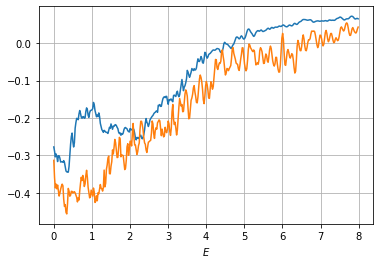

In [148]:
plt.figure()
x6 = -np.mean(Reh6,1)+np.mean(Ree6,1)
plt.plot(fac*Esw6,x6/(6-x6))

x2 = -np.mean(Reh2,1)+np.mean(Ree2,1)
plt.plot(fac*Esw2,x2/(2-x2))


plt.grid()
# plt.ylim(0,1.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E$')
plt.show()
